## Coding project about English language proficiency in relation to GDP per capita

Christian: This here is my analysis of the two countries Denmark and Argentina, and their individual relationships between english language proficiency and GDP per capita.
For this analysis I will use GDP data from Ourworld, as well as language proficiency data from the organisation EF.
I've attempted to look complete most of my code from previous classwork or looking it up on sites such as Stackoverflow.com, 
although AI has been used in assisting me whenever I've gotten stuck.

In [1]:
install.packages('dplyr') # for functions
install.packages('ggplot2') # for plotting
install.packages('dslabs') # for data
install.packages('gridExtra') # for plotting
# install.packages('jsonlite') # for Ourworld

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [2]:
# activating installed packages for analysis 
library(dplyr)
library(ggplot2)
# library(dslabs)
# library(gridExtra)
# library(jsonlite)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# Fetch the GDP data
df <- read.csv("https://ourworldindata.org/grapher/gdp-per-capita-worldbank.csv?v=1&csvType=full&useColumnShortNames=true")

# read in CEFR data

dk_cefr <- read.delim('Data/Denmark_CEFR.csv', sep = ";")
arg_cefr <- read.delim("Data/Argentina_CEFR.csv", sep = ";")

# Filter GDP data to relevant countries
dk_gdp <- df %>% 
    filter(Entity=="Denmark")
arg_gdp <- df %>%
    filter(Entity=="Argentina")

In [4]:
arg_data <- merge(arg_gdp, arg_cefr, all = TRUE)
dk_data <- merge(dk_gdp, dk_cefr, all = TRUE)
country_analysis <- merge(arg_data, dk_data, all = TRUE)

According to these two t-tests, there is seemingly a correlation between GDP and English proficiency, according to the CEFR scale. Let's visualize the relationship by having the graphs side by side.

In [5]:
country_nona = country_analysis %>%
    na.exclude(country_analysis)
country_nona

,Year,Entity,Code,ny_gdp_pcap_pp_kd,CEFR
,<int>,<chr>,<chr>,<dbl>,<int>
43,2011,Argentina,ARG,24647.63,508
44,2011,Denmark,DNK,51293.21,611
45,2012,Argentina,ARG,24118.87,518
46,2012,Denmark,DNK,51216.31,626
47,2013,Argentina,ARG,24424.14,524
48,2013,Denmark,DNK,51479.27,621
49,2014,Argentina,ARG,23550.10,563
50,2014,Denmark,DNK,52048.34,641
51,2015,Argentina,ARG,23933.89,568


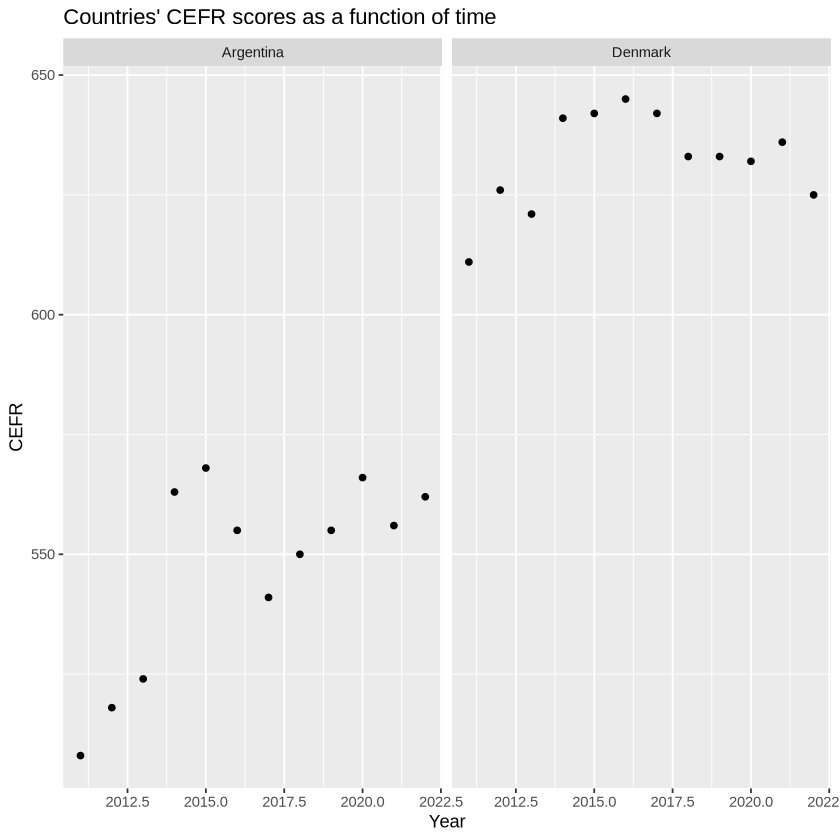

In [11]:
# Plotting CEFR-levels, with lower line of points being Argentina and higher line of points being Denmark
ggplot(country_nona,
      aes(x = Year,
         y = CEFR)) +
    geom_point() +
    facet_wrap( ~Entity) +
    labs(title = "Countries' CEFR scores as a function of time",
         x = "Year",
         y = "CEFR")
    # theme_minimal()

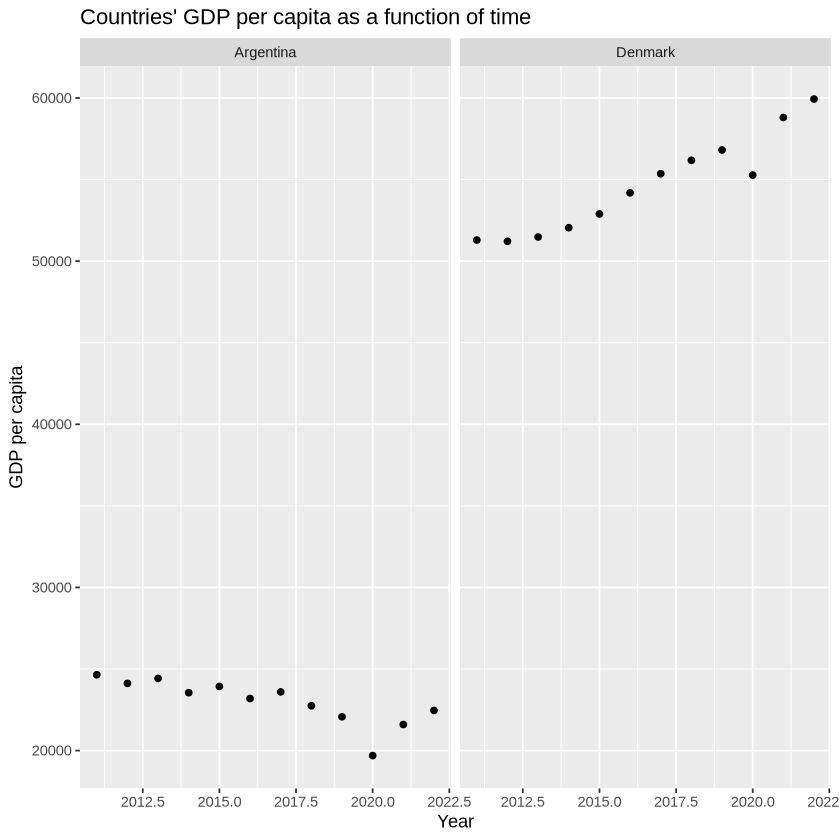

In [12]:
# Plotting GDP per capita in USD of Argentina and Denmark side by side
ggplot(country_nona,
      aes(x = Year,
         y = ny_gdp_pcap_pp_kd)) +
    geom_point() +
    facet_wrap( ~Entity) +
    labs(title = "Countries' GDP per capita as a function of time",
         x = "Year",
         y = "GDP per capita")

In [25]:
# Making t-tests for both Argentina and Denmark
t.test(arg_data$ny_gdp_pcap_pp_kd,arg_data$CEFR)

t.test(dk_data$ny_gdp_pcap_pp_kd,dk_data$CEFR)


	Welch Two Sample t-test

data:  arg_data$ny_gdp_pcap_pp_kd and arg_data$CEFR
t = 36.925, df = 32.006, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 18563.38 20731.02
sample estimates:
 mean of x  mean of y 
20196.3422   549.1429 



	Welch Two Sample t-test

data:  dk_data$ny_gdp_pcap_pp_kd and dk_data$CEFR
t = 50.134, df = 32.001, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 47102.54 51092.20
sample estimates:
 mean of x  mean of y 
49726.3026   628.9286 


Denmark's and Argentina's t-tests have different conclusions. In Denmark's case there is no correlation between GD per capita and CEFR scores. 
In Argentina's case, however, there is a neative correlation, meaning that the higher the GDP per, the lower Argentinians score on the CEFR scale, which is very curious.